In [2]:
!pip install tensorflow

     -------------------------------------- 272.8/272.8 MB 7.5 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 60.2 MB/s eta 0:00:00
     ------------------------------------- 420.6/420.6 kB 25.7 MB/s eta 0:00:00
     --------------------------------------- 23.2/23.2 MB 54.7 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 72.2 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 98.4 MB/s eta 0:00:00
     --------------------------------------- 14.7/14.7 MB 65.1 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 55.7 MB/s eta 0:00:00
     ---------------------------------------- 126.5/126.5 kB ? eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 76.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [3]:
pip install tensorflow==2.5.0

     -------------------------------------- 422.6/422.6 MB 5.0 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 2.9/2.9 MB 46.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 462.4/462.4 kB ? eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     --------------------------------------- 13.3/13.3 MB 54.7 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.12.0-py3-none-any.whl (5.6 MB)
     ---------------------------------------- 42.6/42.6 kB ? eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 57.3 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ------------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
pylint 2.14.5 requires typing-extensions>=3.10.0; python_version < "3.10", but you have typing-extensions 3.7.4.3 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
bokeh 2.4.3 requires typing-extensions>=3.10.0, but you have typing-extensions 3.7.4.3 which is incompatible.
black 22.6.0 requires typing-extensions>=3.10.0.0; python_version < "3.10", but you have typing-extensions 3.7.4.3 which is incompatible.
astroid 2.11.7 requires typing-extensions>=3.10; python_version < "3.10", but you have typing-extensions 3.7.4.3 which is incompatible.


In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
import numpy as np
import pandas as pd

In [7]:
a = tf.add(3, 5)
print(a)

Tensor("Add:0", shape=(), dtype=int32)


In [8]:
a = tf.add(3, 5)
sess = tf.Session()
print(sess.run(a))

8


In [9]:
sess.close()

In [10]:
a = tf.add(3, 5)
with tf.Session() as sess:
    print(sess.run(a))

8


In [11]:
x = 2
y = 3 
op1 = tf.add(x, y)
op2 = tf.multiply(x, y)
op3 = tf.pow(op2, op1)

In [12]:
with tf.Session() as sess:
    op3 = sess.run(op3)
    print(op3)

7776


In [13]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [15]:
x_data = datasets.load_boston().data[:, 12]
y_data = datasets.load_boston().target
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [16]:
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

y_predicted = w * x_data + b # model

In [17]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # tf.Variables 초기화 
    
    for step in range(10000):
        sess.run(train) # 실제로 Gradient Descent가 실행되는 코드 
        if step % 1000 == 0:
            print('Step {}: w {} b {}'.format(step, sess.run(w), sess.run(b)))
            print('loss {}'.format(sess.run(loss)))
            print()
            
    w_out, b_out = sess.run([w, b])

Step 0: w [0.2585815] b [-0.6596953]
loss 509.6607666015625

Step 1000: w [0.35507017] b [12.815334]
loss 152.4705352783203

Step 2000: w [-0.14311329] b [21.113245]
loss 82.0577392578125

Step 3000: w [-0.45113248] b [26.243713]
loss 55.14060592651367

Step 4000: w [-0.64157575] b [29.415802]
loss 44.8508186340332

Step 5000: w [-0.75932485] b [31.37707]
loss 40.9172477722168

Step 6000: w [-0.83212644] b [32.58968]
loss 39.41353988647461

Step 7000: w [-0.8771392] b [33.339424]
loss 38.83871078491211

Step 8000: w [-0.90496975] b [33.802982]
loss 38.618961334228516

Step 9000: w [-0.92217714] b [34.089596]
loss 38.53494644165039



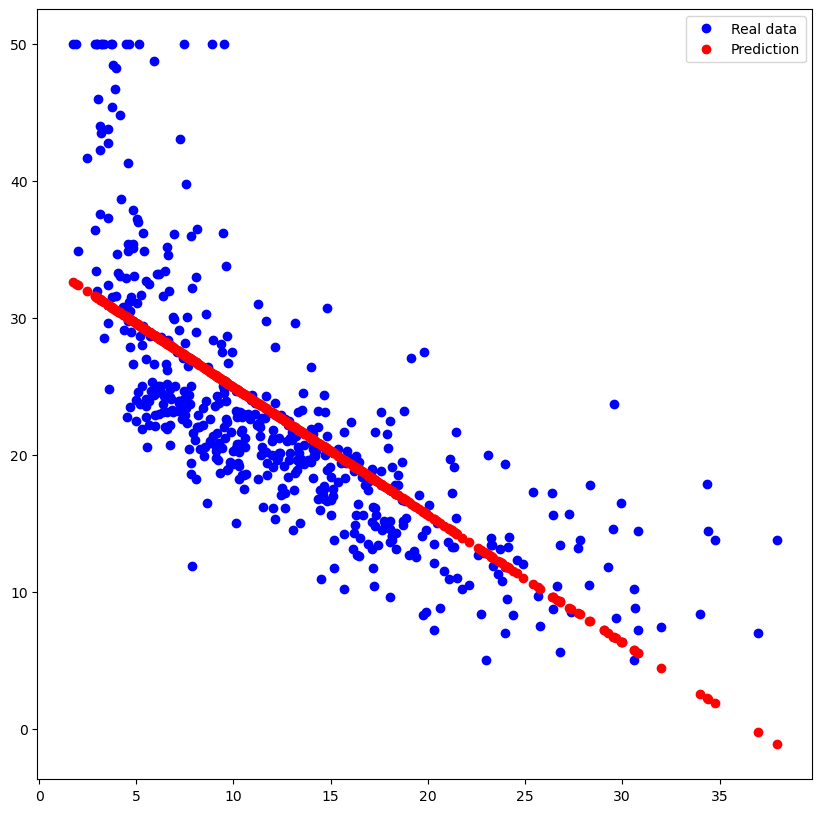

In [20]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * w_out + b_out, 'ro', label='Prediction')
plt.legend()
plt.show()